# Connectionist Bench (Sonar, Mines vs. Rocks) Data Set

## Source:

### The data set was contributed to the benchmark collection by Terry Sejnowski, now at the Salk Institute and the University of California at San Deigo. The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.


## Data Set Information:

### The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

### Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

### The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

## Source: University of California ML Repository
### https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### This is a binary classification problem
### 'R' is for the class Rock and 'M' is for class Mine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

df = pd.read_csv('sonar.all-data.csv', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

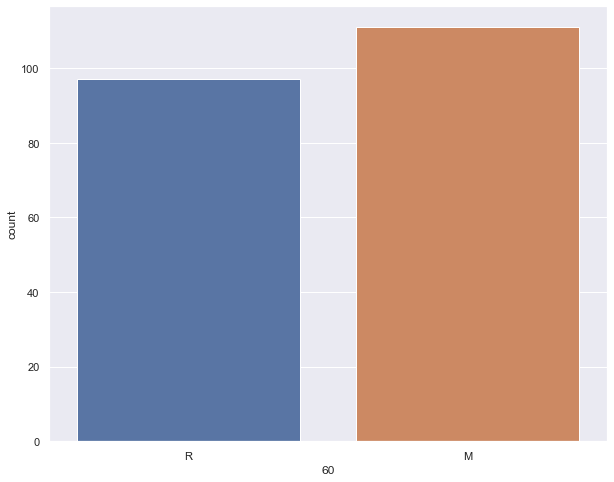

In [6]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.countplot(df[60], ax=axs)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002061CF06F08>,
      dtype=object)

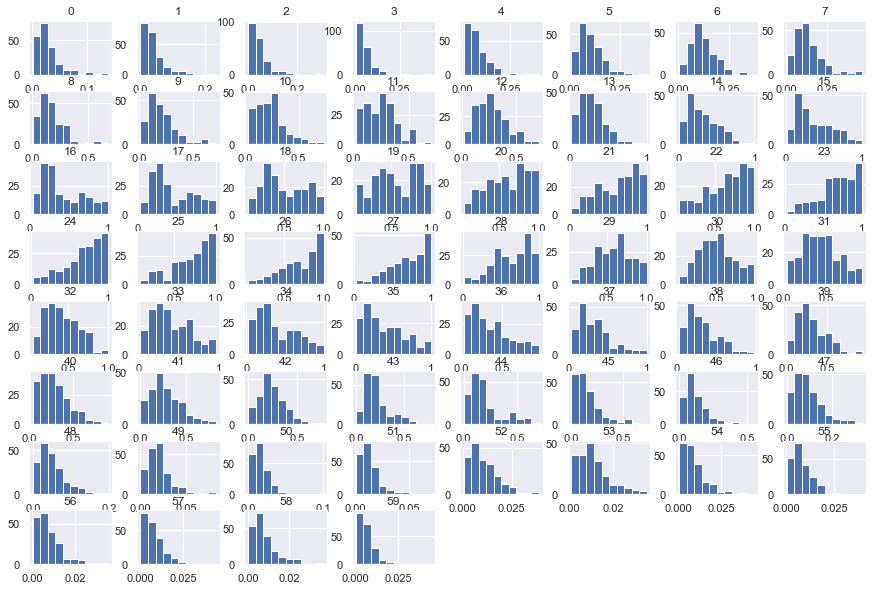

In [7]:
df.hist(figsize=(15, 10))

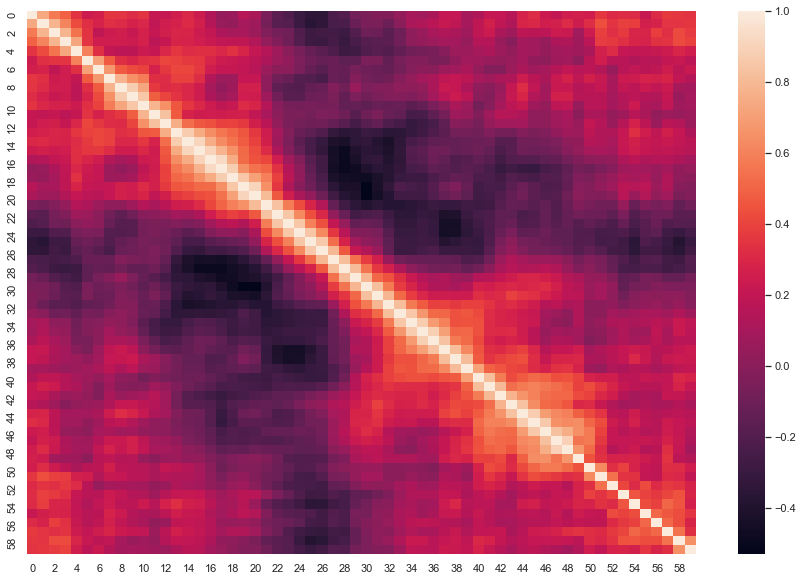

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())

In [9]:
X = df.drop(columns=60).values
y = df[60]
y = y.map({'R' : 0, 'M' : 1}).values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
classifiers = [('KNN', KNeighborsClassifier()), 
               ('SVC', SVC()), 
               ('GPC', GaussianProcessClassifier()), 
               ('DTC', DecisionTreeClassifier()), 
               ('RFC', RandomForestClassifier()), 
               ('MLPC', MLPClassifier()), 
               ('ABC', AdaBoostClassifier()), 
               ('GNB', GaussianNB()), 
               ('QDA', QuadraticDiscriminantAnalysis()), 
               ('LDA', LinearDiscriminantAnalysis()), 
               ('LR', LogisticRegression())]

In [12]:
results = []
names = []
scoring = 'accuracy'

for name, classifier in classifiers:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_score = cross_val_score(estimator=classifier, X=X_train, y=y_train, scoring=scoring)
    results.append(cv_score)
    names.append(name)
    print('Classifier: {}, Mean Accuracy: {}, StDev: {}'.format(name, cv_score.mean(), cv_score.std()))

Classifier: KNN, Mean Accuracy: 0.7198412698412697, StDev: 0.05541933412728915
Classifier: SVC, Mean Accuracy: 0.7775132275132275, StDev: 0.08170021489615896
Classifier: GPC, Mean Accuracy: 0.7920634920634921, StDev: 0.08173447290755867
Classifier: DTC, Mean Accuracy: 0.6687830687830688, StDev: 0.05416888735749315
Classifier: RFC, Mean Accuracy: 0.7407407407407407, StDev: 0.06256487912199048


C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Classifier: MLPC, Mean Accuracy: 0.7917989417989417, StDev: 0.05597973614263095
Classifier: ABC, Mean Accuracy: 0.7701058201058201, StDev: 0.05226725943757797
Classifier: GNB, Mean Accuracy: 0.6984126984126984, StDev: 0.10615357510077908
Classifier: QDA, Mean Accuracy: 0.5468253968253969, StDev: 0.014504497525791322
Classifier: LDA, Mean Accuracy: 0.7560846560846561, StDev: 0.05973566062545665
Classifier: LR, Mean Accuracy: 0.7917989417989417, StDev: 0.07870803865168093


C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


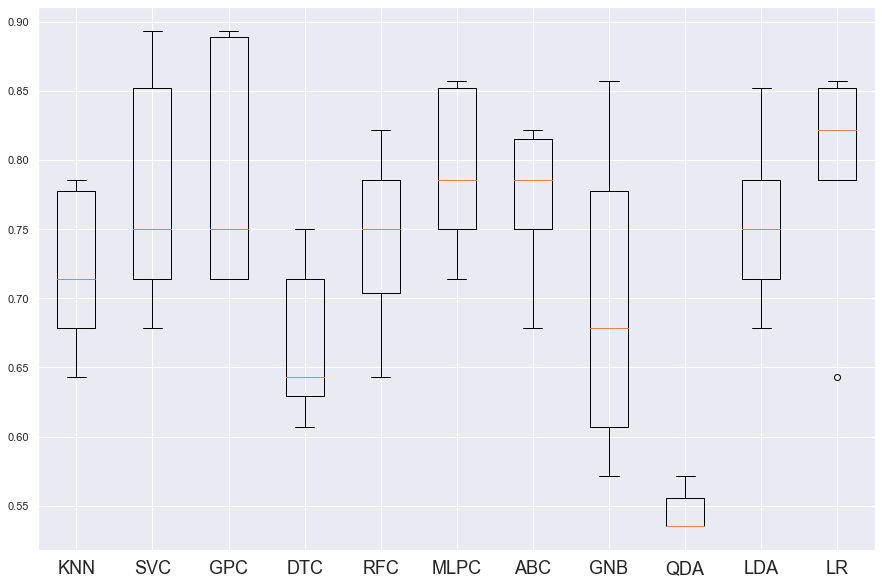

In [13]:
fig, axs = plt.subplots(figsize=(15, 10))
axs.boxplot(results)
axs.set_xticklabels(names, fontdict={'size' : 18})
plt.show()

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
results_scaled_data = []
names = []

for name, model in classifiers:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_score = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, scoring='accuracy')
    results_scaled_data.append(cv_score)
    names.append(name)
    print('Model: {}, Mean Score: {}, Score StDev: {}'.format(name, cv_score.mean(), cv_score.std()))

Model: KNN, Mean Score: 0.8058201058201057, Score StDev: 0.03599633872432731
Model: SVC, Mean Score: 0.8349206349206348, Score StDev: 0.09154891770843217
Model: GPC, Mean Score: 0.8423280423280423, Score StDev: 0.0475116366498143
Model: DTC, Mean Score: 0.6761904761904762, Score StDev: 0.07158712561129957
Model: RFC, Mean Score: 0.7412698412698413, Score StDev: 0.08497624644015347


C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Model: MLPC, Mean Score: 0.834920634920635, Score StDev: 0.0796265534043429
Model: ABC, Mean Score: 0.7486772486772487, Score StDev: 0.04867293516659812
Model: GNB, Mean Score: 0.6984126984126984, Score StDev: 0.10615357510077908
Model: QDA, Mean Score: 0.5468253968253969, Score StDev: 0.014504497525791322
Model: LDA, Mean Score: 0.7560846560846561, Score StDev: 0.05973566062545665
Model: LR, Mean Score: 0.7849206349206349, Score StDev: 0.06651532330081573


C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


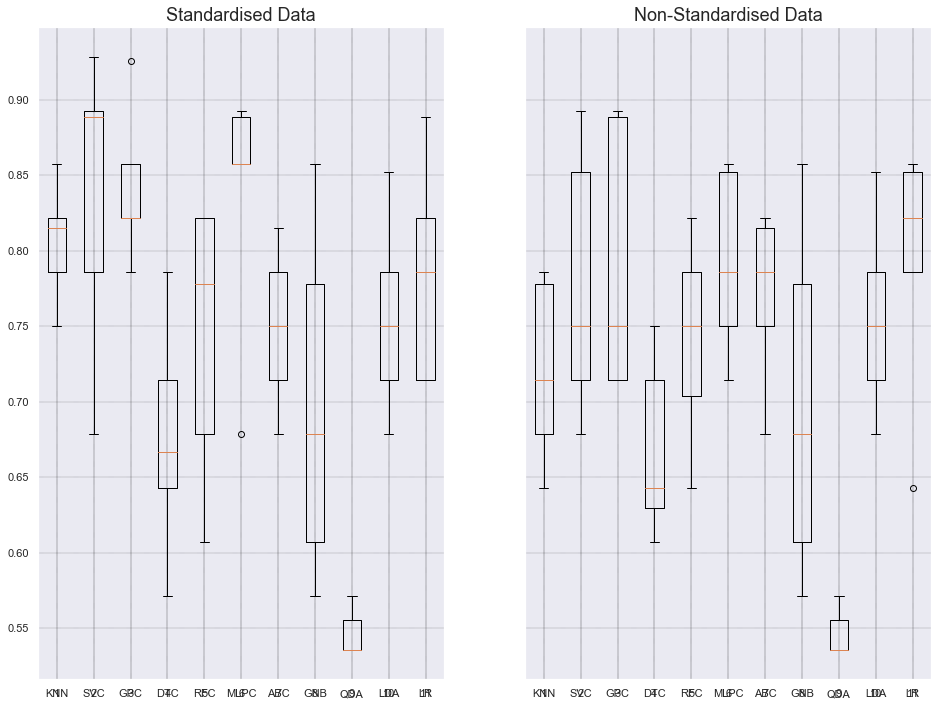

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
axs[0].boxplot(results_scaled_data)
axs[0].set_title('Standardised Data', fontdict={'size' : 18})
axs[0].set_xticklabels(names)
axs[0].grid(linestyle='dashed', linewidth=0.2, color='black')

axs[1].boxplot(results)
axs[1].set_title('Non-Standardised Data', fontdict={'size' : 18})
axs[1].grid(linestyle='dashed', linewidth=0.2, color='black')

### It looks like standardised data is producing better results, as the accuracy score distributions are a bit higher than the non-standardised data. 
## Next, we pick three best performing models, GPC (Gaussian Process Classifier), MPLC (MPL Classifier) and SVC (Support Vector Classifier), and attempt to improve results further by parameter tuning.

# Tuning SVC

In [17]:
svc = SVC()

param_grid = {'C' : [1, 10, 100, 1000], 'kernel' : ['linear', 'rbf', 'sigmoid'], 
              'gamma' : ['scale', 'auto', 1.0, 0.1, 0.01, 0.001, 0.0001]}

kfold = KFold(n_splits=10, shuffle=True)
gsearch = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kfold)
gsearch.fit(X_train_scaled, y_train)
gsearch.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
svc = SVC(**gsearch.best_params_)
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)

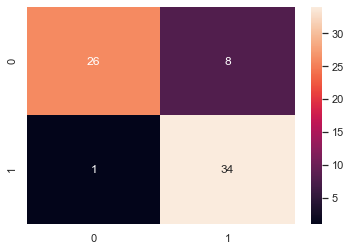

In [19]:
svc_cm = confusion_matrix(y_test, svc_preds)

sns.heatmap(svc_cm, annot=True)

In [20]:
svc_clf_report = classification_report(y_test, svc_preds)
print(svc_clf_report)

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        34
           1       0.81      0.97      0.88        35

    accuracy                           0.87        69
   macro avg       0.89      0.87      0.87        69
weighted avg       0.89      0.87      0.87        69



# Tuning and applying MLP Classifier 

In [21]:
mlpc = MLPClassifier()

mlpc_grid = {'hidden_layer_sizes' : [(100,), (100, 100), (150, 150), (200, 200)], 
            'alpha' : [0.0001, 0.001, 0.01, 0.1], 
            'learning_rate' : ['constant', 'invscaling', 'adaptive']}

mlpc_kfold = KFold(n_splits=10, shuffle=True)
mlpc_search = GridSearchCV(estimator=mlpc, param_grid=mlpc_grid, scoring='accuracy', cv=mlpc_kfold)
mlpc_search.fit(X_train_scaled, y_train)
mlpc_search.best_params_

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kamra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'adaptive'}

In [22]:
mlp_clf = MLPClassifier(**mlpc_search.best_params_)
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
mlpc_preds = mlp_clf.predict(X_test_scaled)

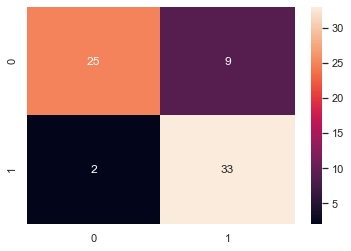

In [24]:
mlpc_cm = confusion_matrix(y_test, mlpc_preds)
sns.heatmap(mlpc_cm, annot=True)

In [25]:
mlpc_clf_report = classification_report(y_test, mlpc_preds)
print(mlpc_clf_report)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        34
           1       0.79      0.94      0.86        35

    accuracy                           0.84        69
   macro avg       0.86      0.84      0.84        69
weighted avg       0.85      0.84      0.84        69



# Gaussian Process Classifier 

In [26]:
gpc = GaussianProcessClassifier()

gpc_param_grid = {'optimizer' : ['fmin_l_bfgs_b', None], 'n_restarts_optimizer' : [0, 1, 3, 5, 9], 
                 'max_iter_predict' : [50, 100, 200, 500, 1000]}

gpc_kfold = KFold(n_splits=10, shuffle=True)
gpc_grid_search = GridSearchCV(estimator=gpc, param_grid=gpc_param_grid, scoring='accuracy', cv=gpc_kfold)
gpc_grid_search.fit(X_train_scaled, y_train)
print(gpc_grid_search.best_params_)

{'max_iter_predict': 50, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b'}


In [27]:
gp_clf = GaussianProcessClassifier(**gpc_grid_search.best_params_)
gp_clf.fit(X_train_scaled, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=50,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [28]:
gpc_preds = gp_clf.predict(X_test_scaled)

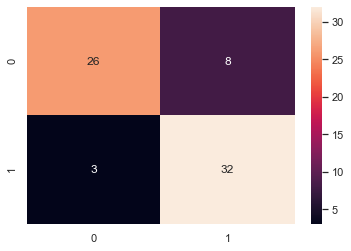

In [29]:
gpc_cm = confusion_matrix(y_test, gpc_preds)
sns.heatmap(gpc_cm, annot=True)

In [30]:
gpc_cr = classification_report(y_test, gpc_preds)
print(gpc_cr)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.80      0.91      0.85        35

    accuracy                           0.84        69
   macro avg       0.85      0.84      0.84        69
weighted avg       0.85      0.84      0.84        69



# We do not want our soldiers blown up by live mines. So we choose the model with the highest (positive class) recall score

In [31]:
print('SVC recall score: {}'.format(recall_score(y_test, svc_preds)))
print('MLPClassifier recall score: {}'.format(recall_score(y_test, mlpc_preds)))
print('GaussianProcessClassifier recall score: {}'.format(recall_score(y_test, gpc_preds)))

SVC recall score: 0.9714285714285714
MLPClassifier recall score: 0.9428571428571428
GaussianProcessClassifier recall score: 0.9142857142857143
